In [1]:
import numpy as np
import corner
import matplotlib.pyplot as plt
#import gwatpy.plot as gp; gp.set()
from gwatpy import mcmc_routines as gmcmc
from gwatpy import util as gutil
from gwatpy import plot as gpu;gpu.set()

import h5py
import scipy
from scipy.special import erf
from scipy.integrate import quad
from scipy.stats import gaussian_kde
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d
from scipy import stats

In [2]:
def AC(data):
    h = 0
    N = len(data)
    acs = np.ones(int(N))
    mean = np.mean(data)
    for l in np.arange(int(N)):
        acs[l] = 1./(N-h) * np.sum( (data[h:]-mean)*(data[:N-h]-mean) )
        h +=1
    acs/=acs[0]
    return acs

In [3]:
# file_DIR = "../data/fixed_dim/GR_injection/heavy/GR/"
file_DIR = "../data/data_runs/GW151226/EdGB/v1/"
#file_DIR = "/Users/sperkins/git-repos/constraining_dCS/data/GW151226/EdGB/"

recalc_AC = True

In [5]:
# gwat = gmcmc.trim_thin_file(file_DIR+"output_injection.hdf5",trim=None,ac=None,recalc_ac=recalc_AC)
gwat = gmcmc.trim_thin_file(file_DIR+"output_GW151226.hdf5",trim=None,ac=None,recalc_ac=recalc_AC,calc_correlation=False)
#gwat=gwat[:2000]
print("length: ",len(gwat))

fig= corner.corner(gwat)
plt.show()
plt.close()

trim:  43904
ac:  515.12
CHAIN 0 1.562815173803887 6
CHAIN 104 1.7047663768980499 4
CHAIN 112 2.296358623643483 12
CHAIN 120 2.193310596081774 12
CHAIN 128 2.596386567545381 12
CHAIN 136 1.5381859867996113 3
CHAIN 144 1.6868242036160788 9
CHAIN 152 1.5528653057118769 9
CHAIN 16 1.9660761279399233 1
CHAIN 160 1.779345317789279 12
CHAIN 168 1.9209165444400216 12
CHAIN 176 1.8290472487015843 9
CHAIN 184 1.7563283876416462 12
CHAIN 192 2.728020490752638 12
CHAIN 200 1.8046499506938622 10
CHAIN 208 1.5434574106839394 6
CHAIN 216 2.0754198605446463 12
CHAIN 224 1.7846683753586694 12
CHAIN 232 2.0392901387464875 12
CHAIN 24 1.6104030655040371 10
CHAIN 240 1.589181712066774 4
CHAIN 248 1.7649213699457107 11
CHAIN 256 1.9890547310175277 4
CHAIN 264 2.0811824146587403 13
CHAIN 272 1.948100652632446 8
CHAIN 280 2.7940377521583977 10
CHAIN 288 3.9020213966532413 12


KeyboardInterrupt: 

In [9]:
#gwat = np.loadtxt("/Users/sperkins/Downloads/LOSC_data/Posterior_samples/GW150914/LVC_posterior_samples.csv",delimiter=',')
#F  = h5py.File("/Users/sperkins/Downloads/LOSC_data/Posterior_samples/GW190924/GW190924_021846.h5",'r')
F  = h5py.File("/Users/sperkins/Downloads/LOSC_data/Posterior_samples/GW190720/GW190720_000836.h5",'r')

data = F["C01:IMRPhenomPv2"]["posterior_samples"]
labels = ["ra","dec","psi","cos_iota","t0","luminosity_distance","chirp_mass","symmetric_mass_ratio","mass_1","mass_2","a_1","a_2","cos_tilt_1","cos_tilt_2","spin_1z","spin_2z","chi_eff","chi_p"]
plotdat=data[labels[0]]
plotdat = np.asarray( [ np.asarray([x]) for x in plotdat])
for l in labels[1:]:
    plotdat = np.insert(plotdat,len(plotdat[0]),data[l],axis=1)
gwat = plotdat

In [ ]:
for d in gwat.T:
    cc,pval = scipy.stats.spearmanr()

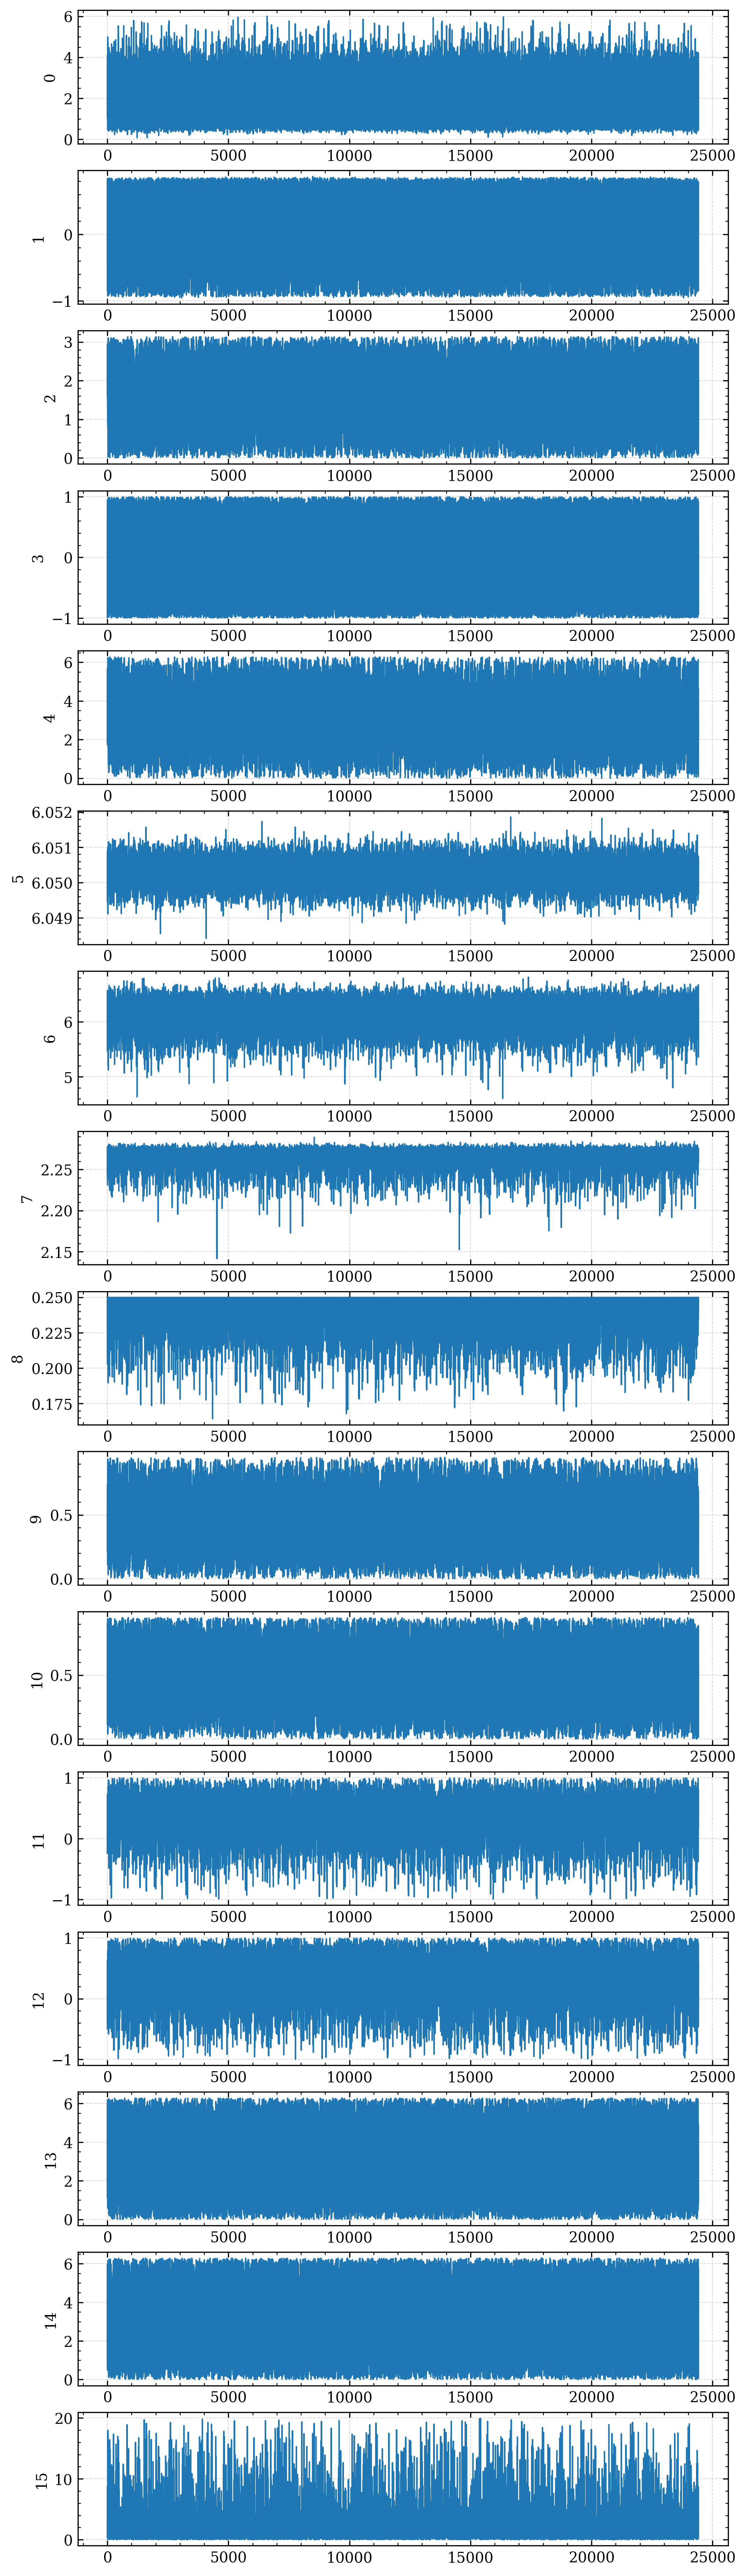

In [5]:
plt.close()
fig, ax = plt.subplots(nrows=len(gwat[0]),ncols=1,figsize=[8,2*len(gwat[0])])
ct = 0
for x in gwat.T:
    ax[ct].plot(x)
    ax[ct].set_ylabel(ct)
    ct+=1
    

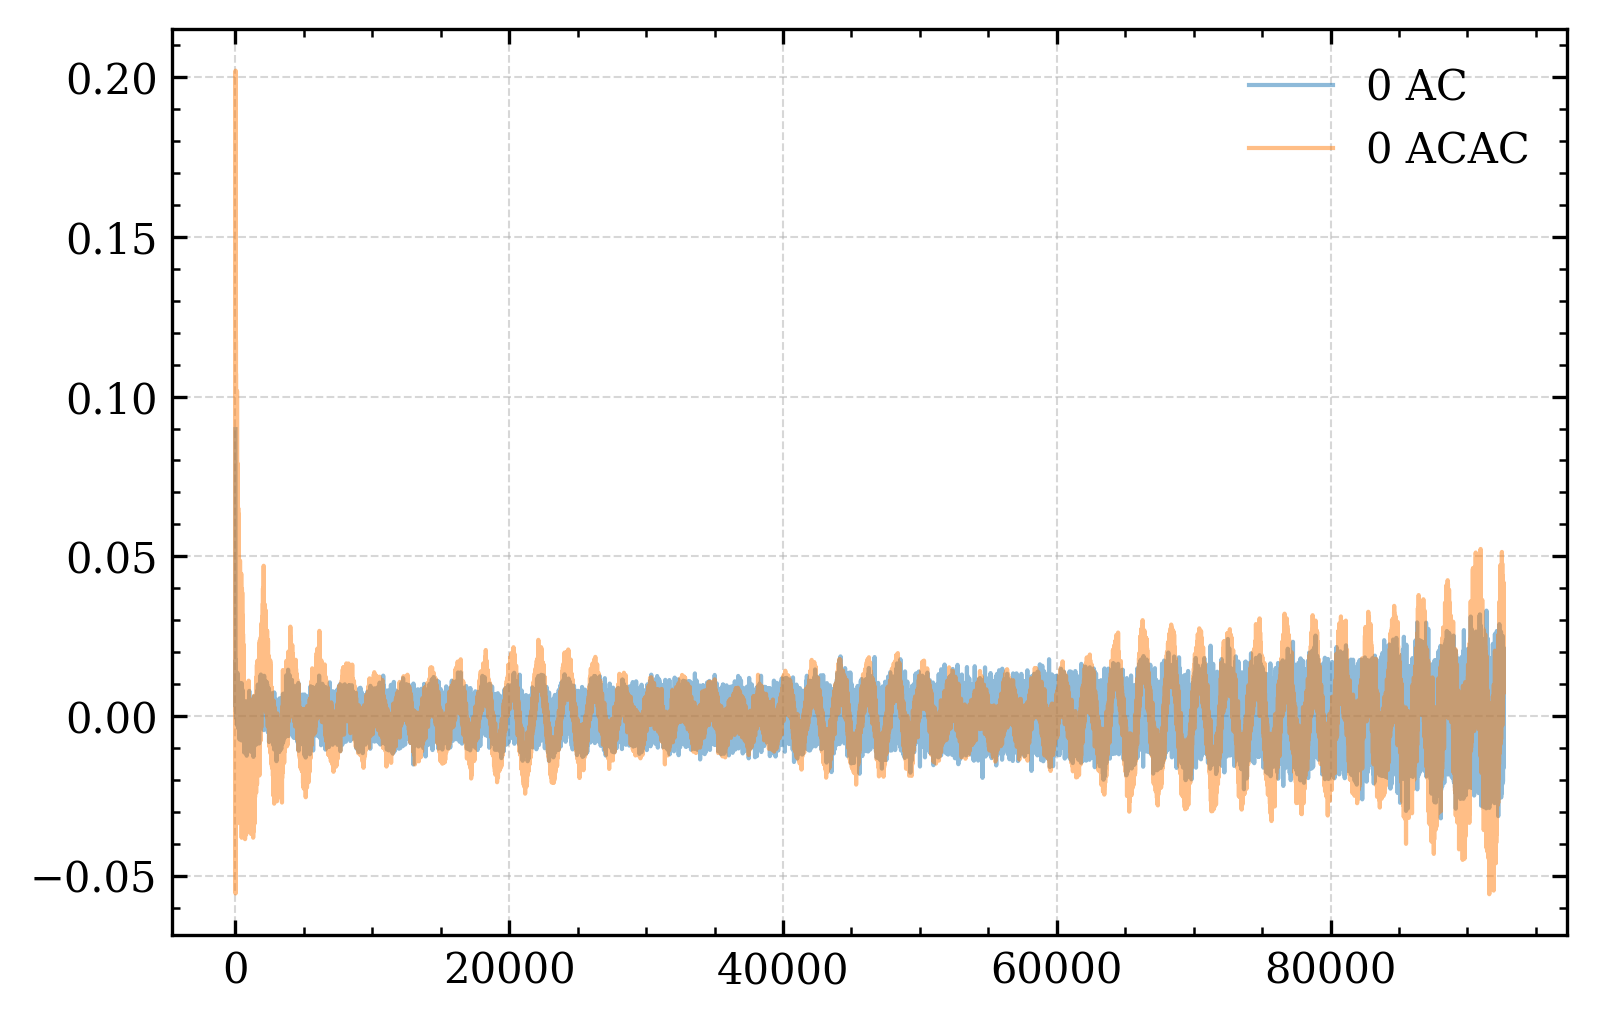

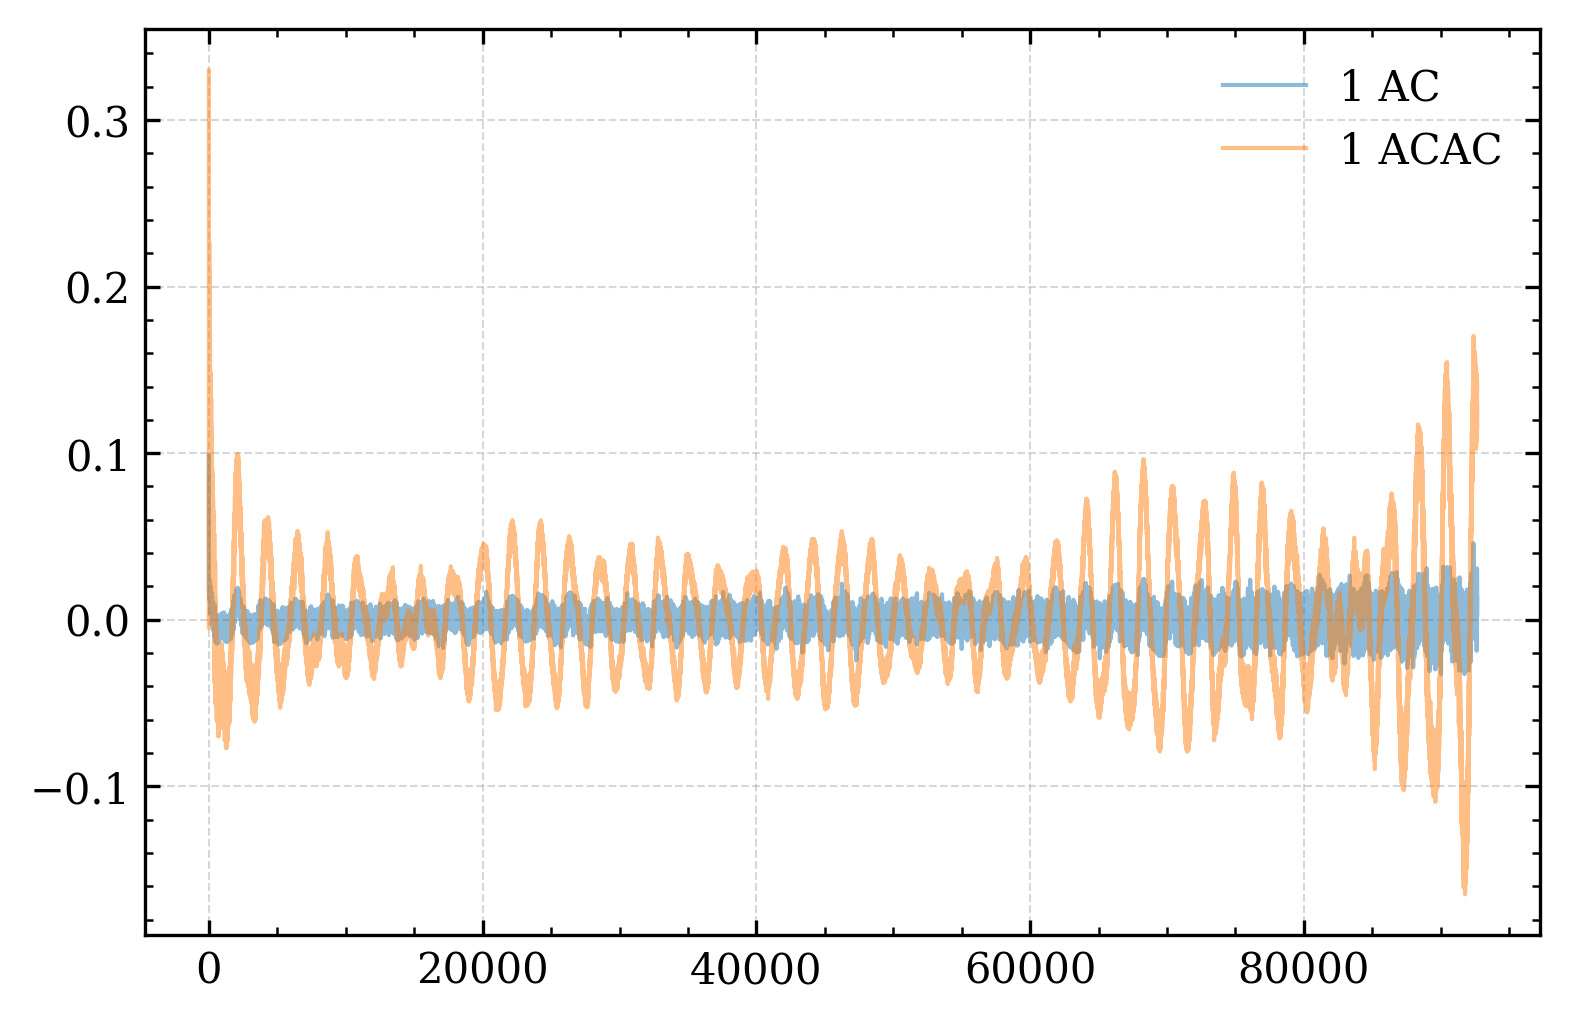

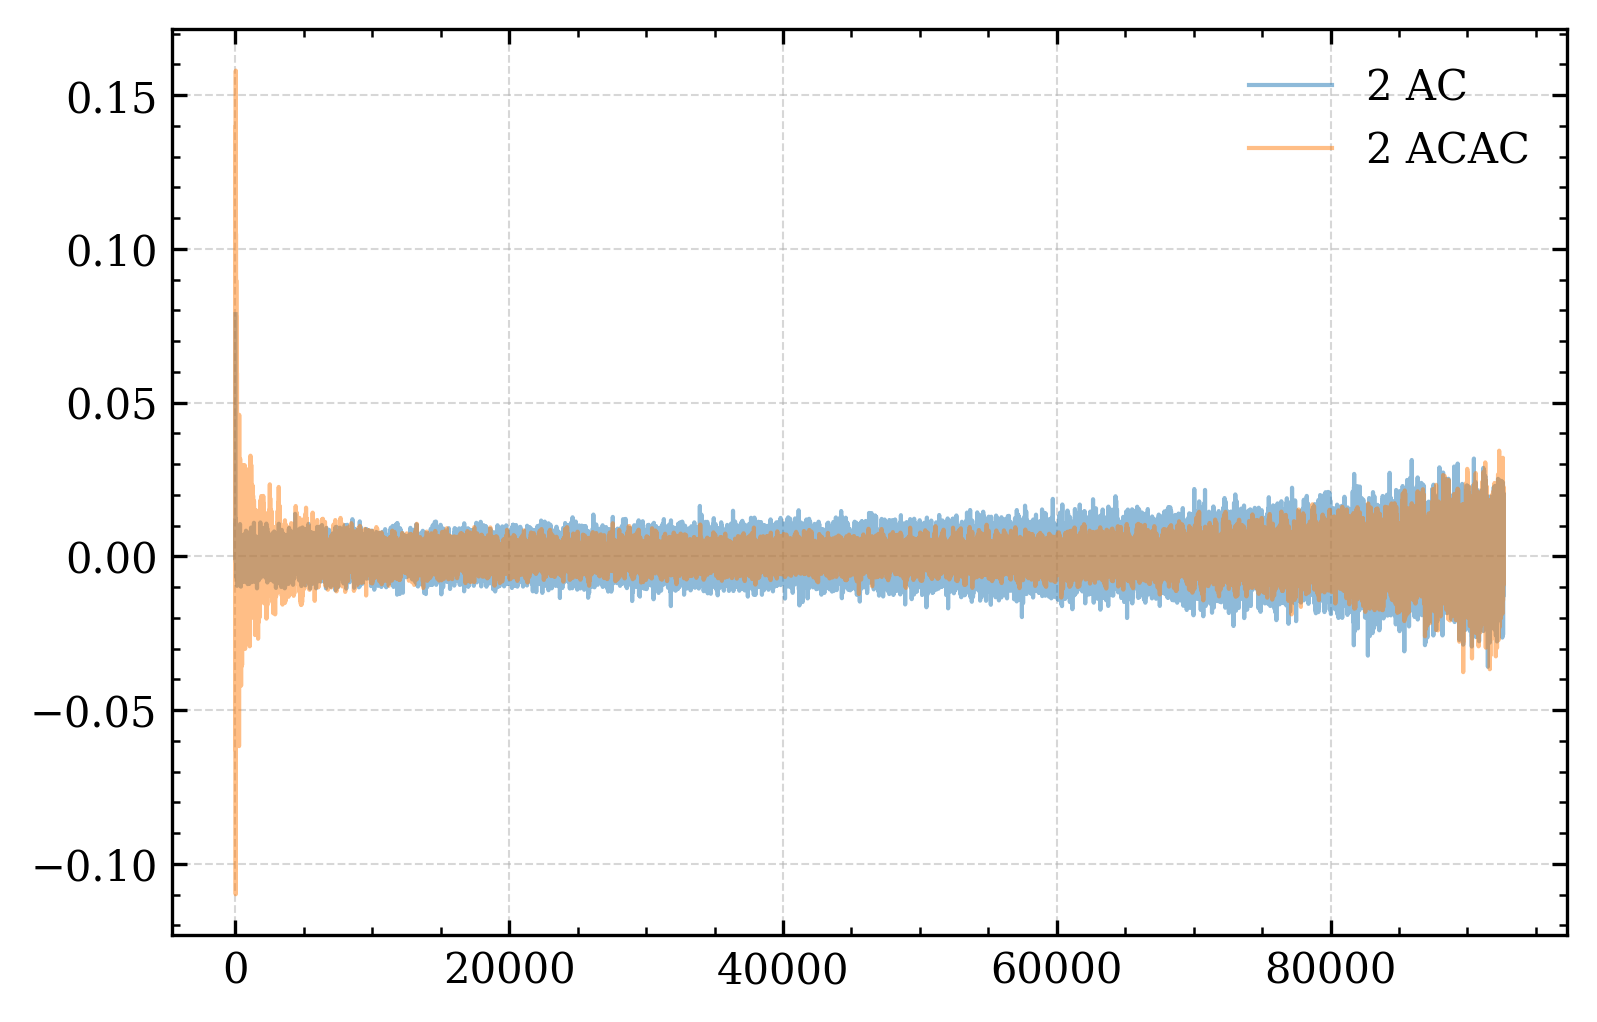

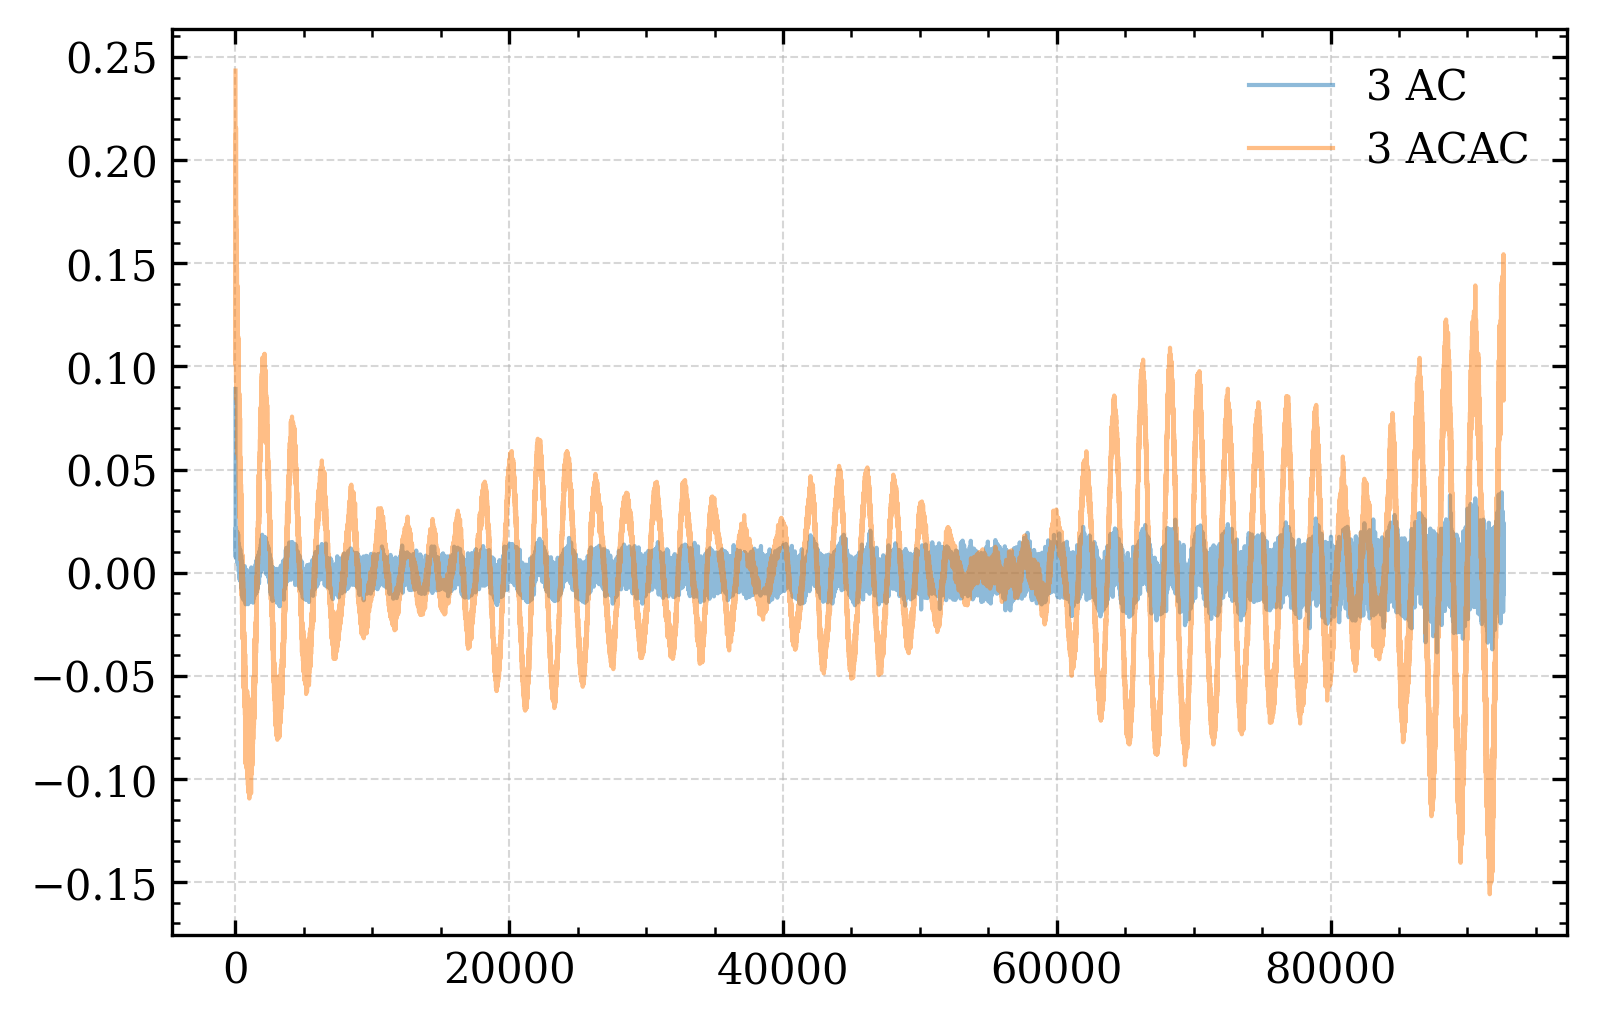

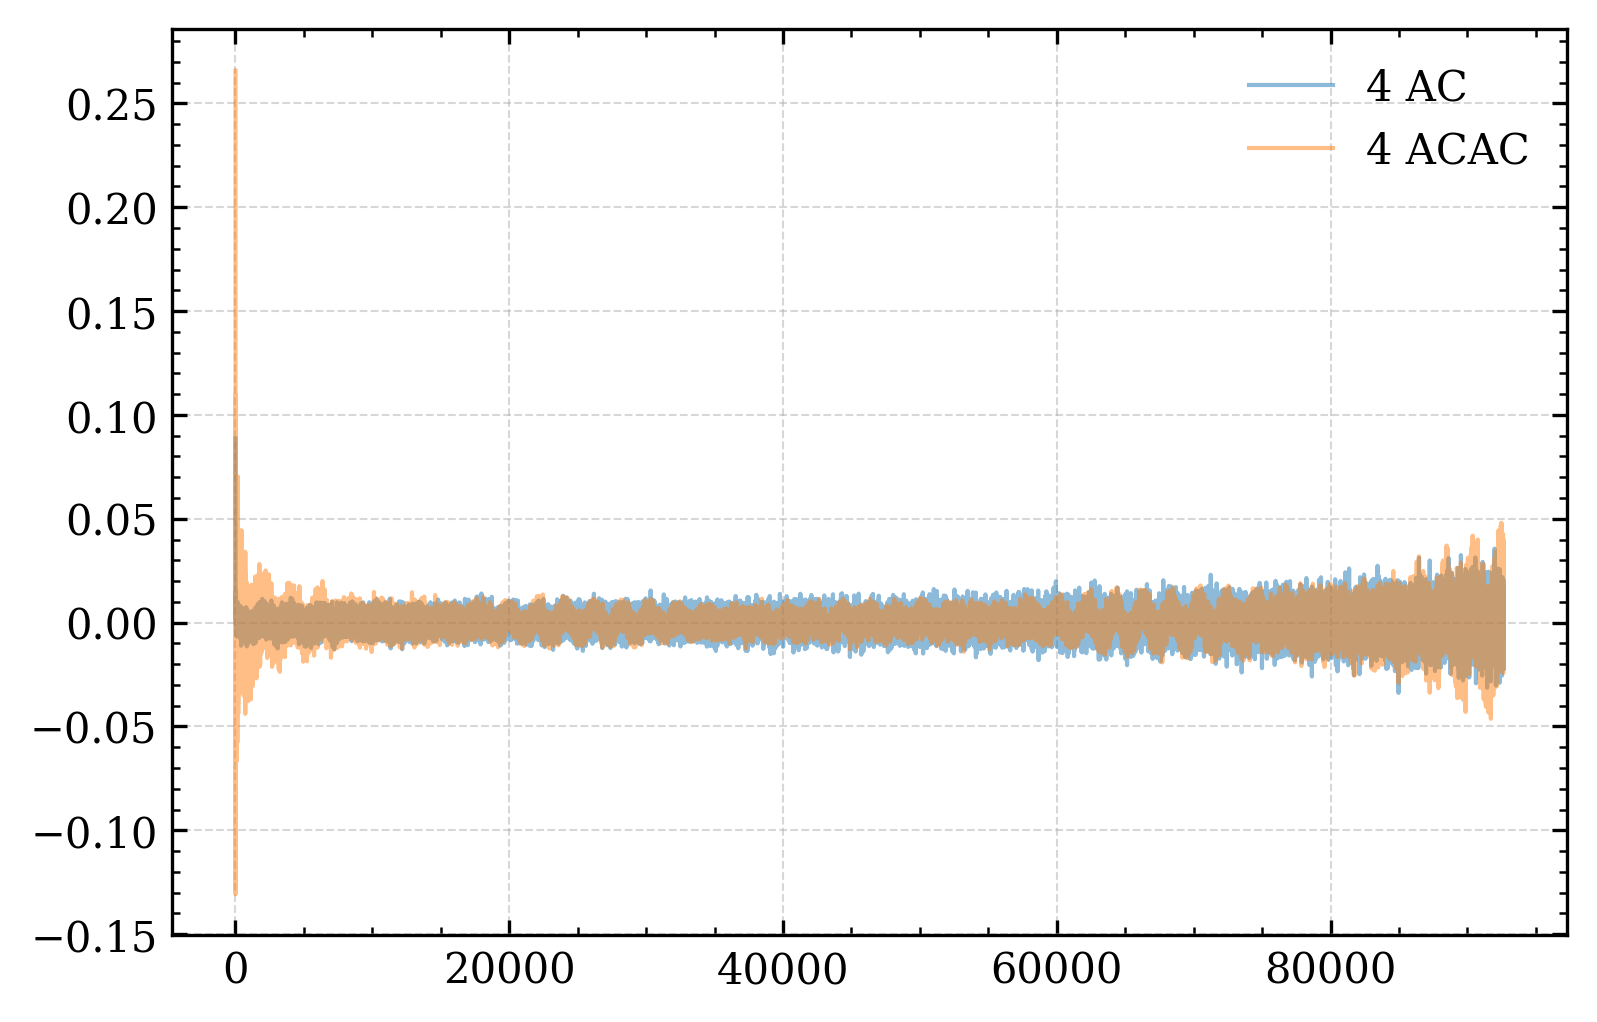

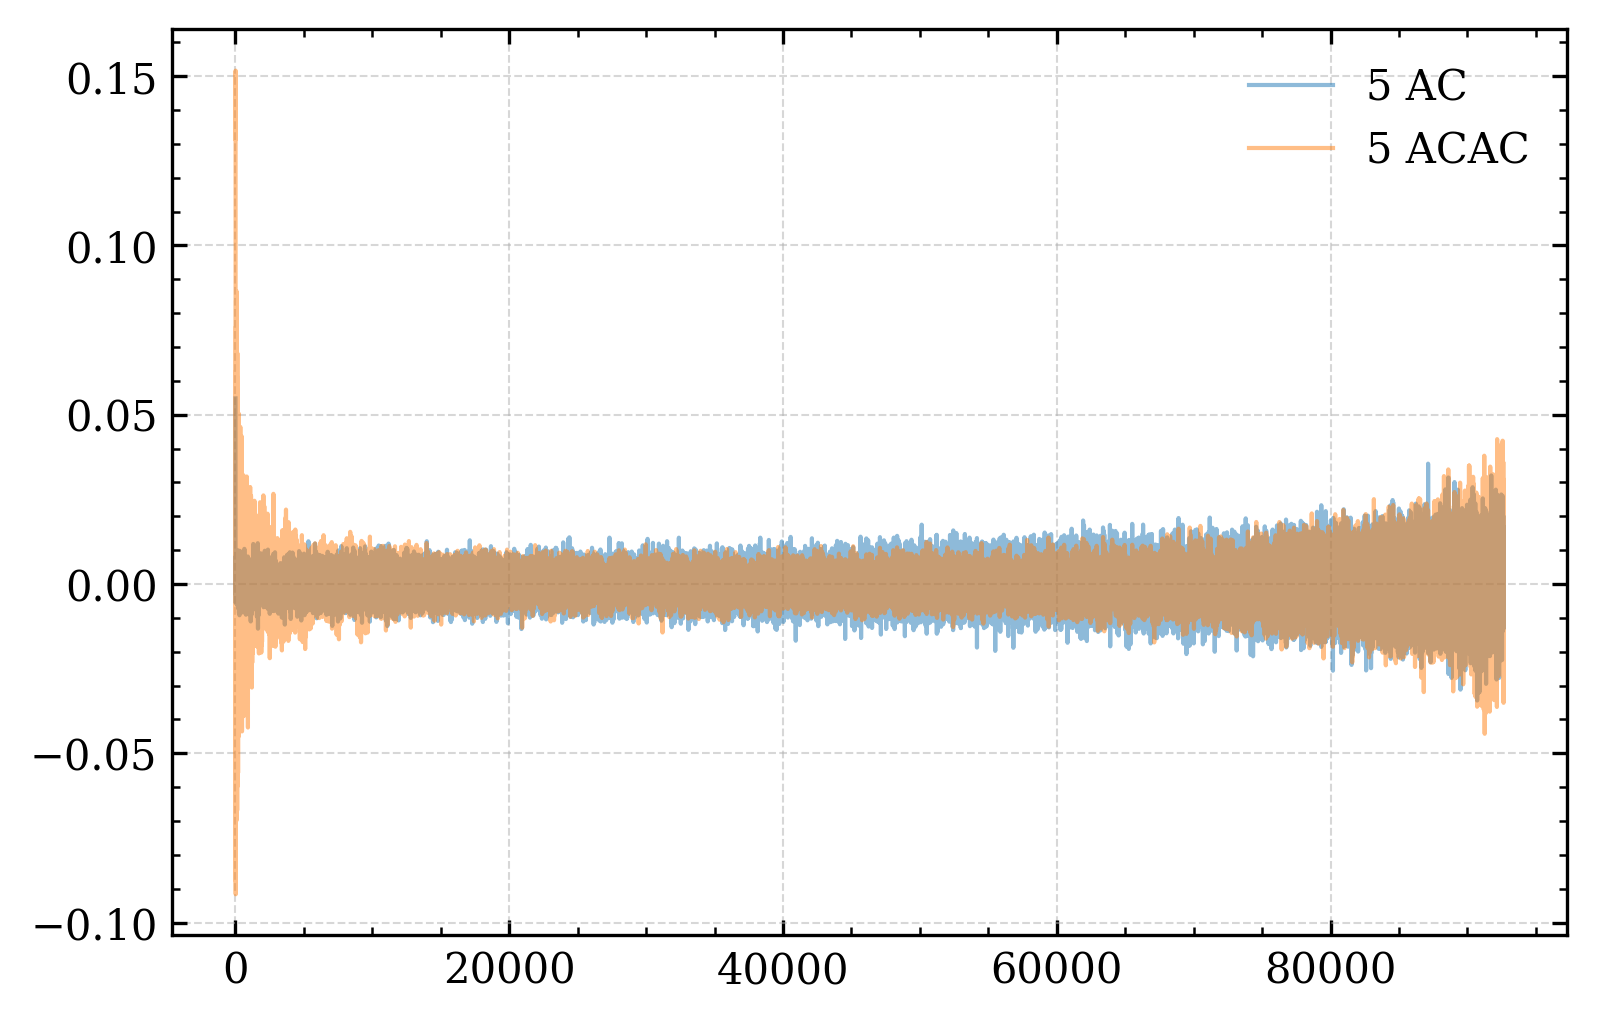

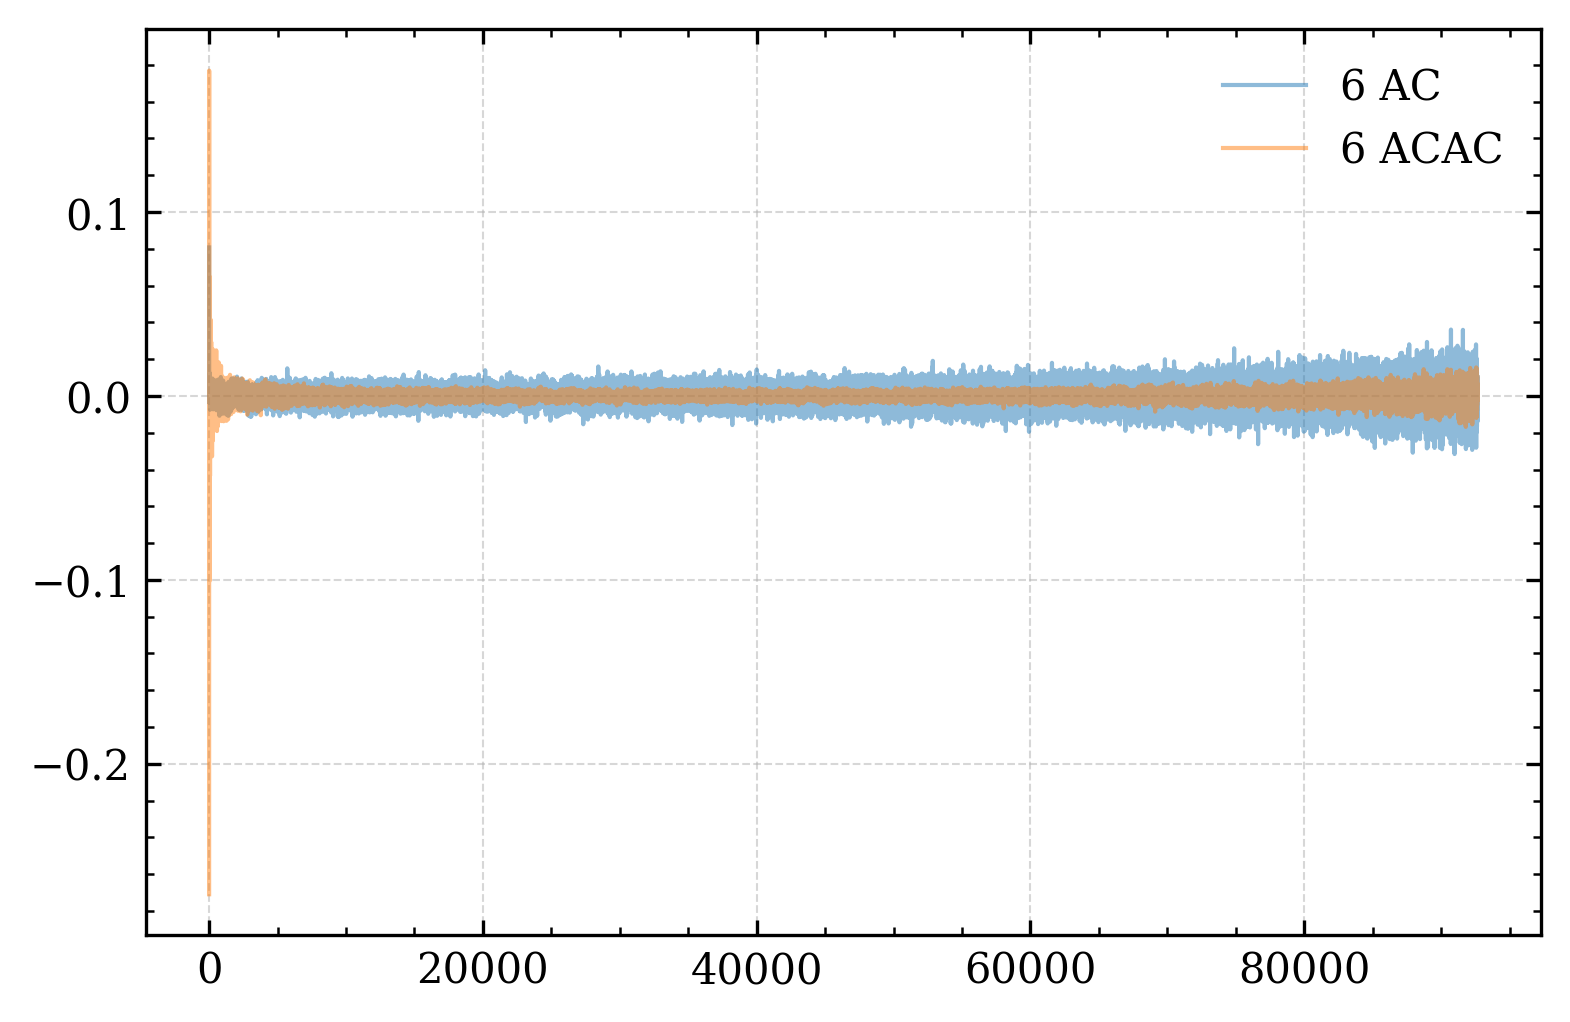

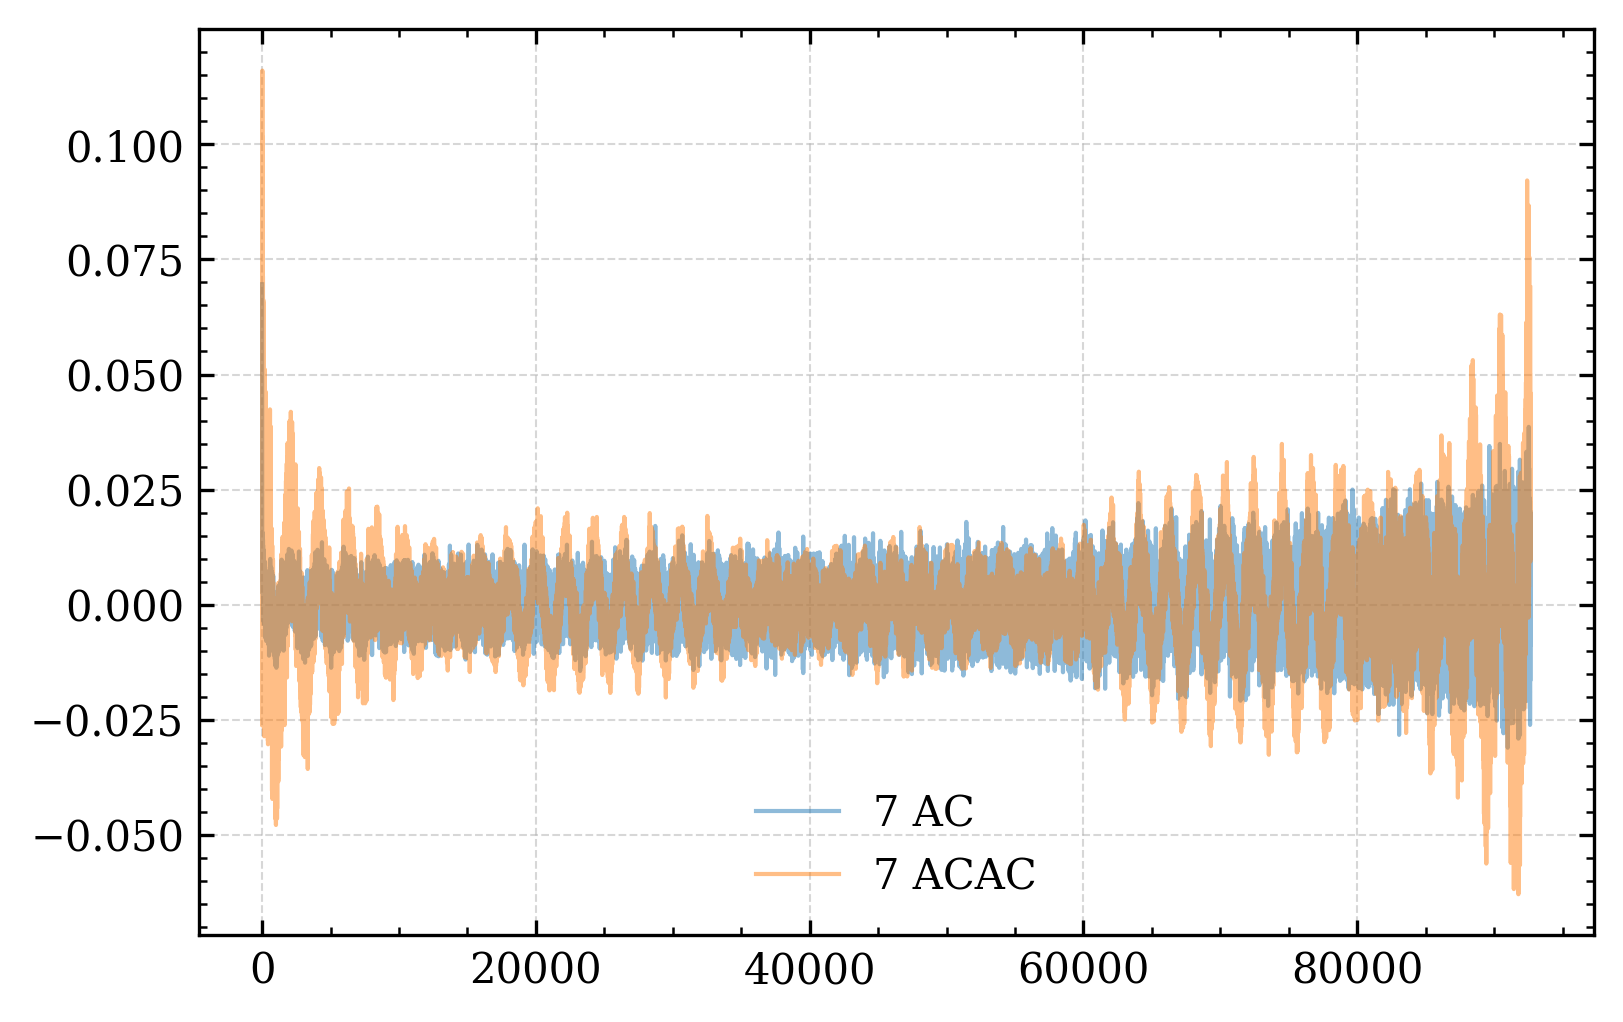

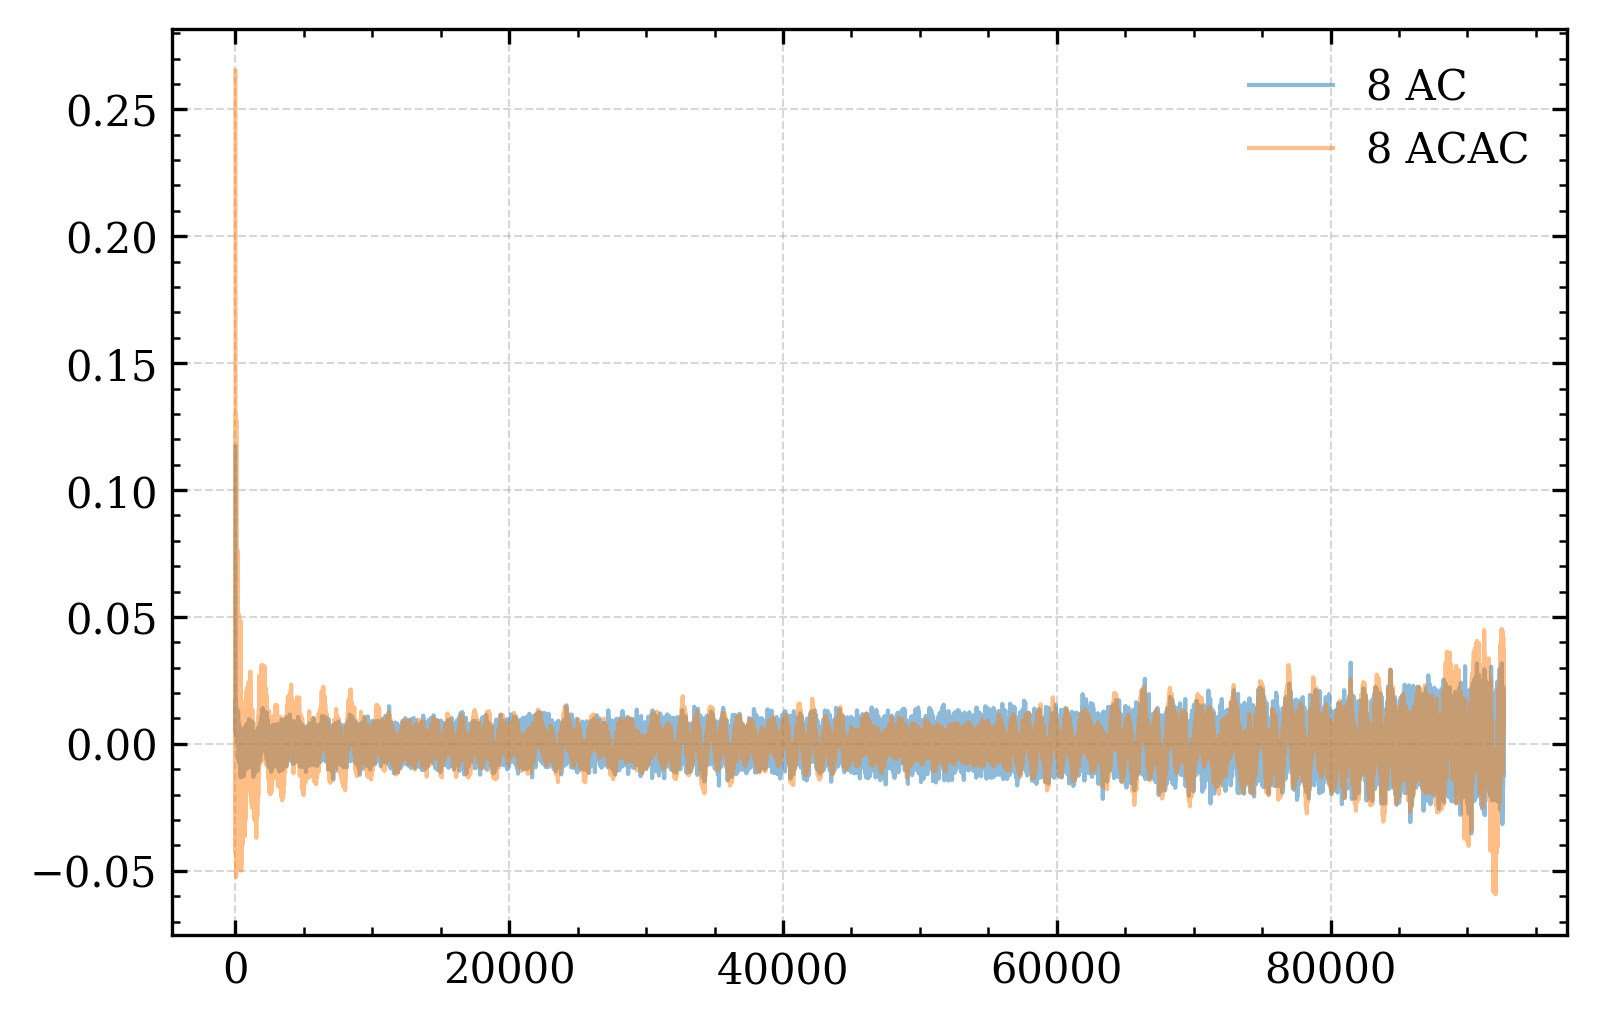

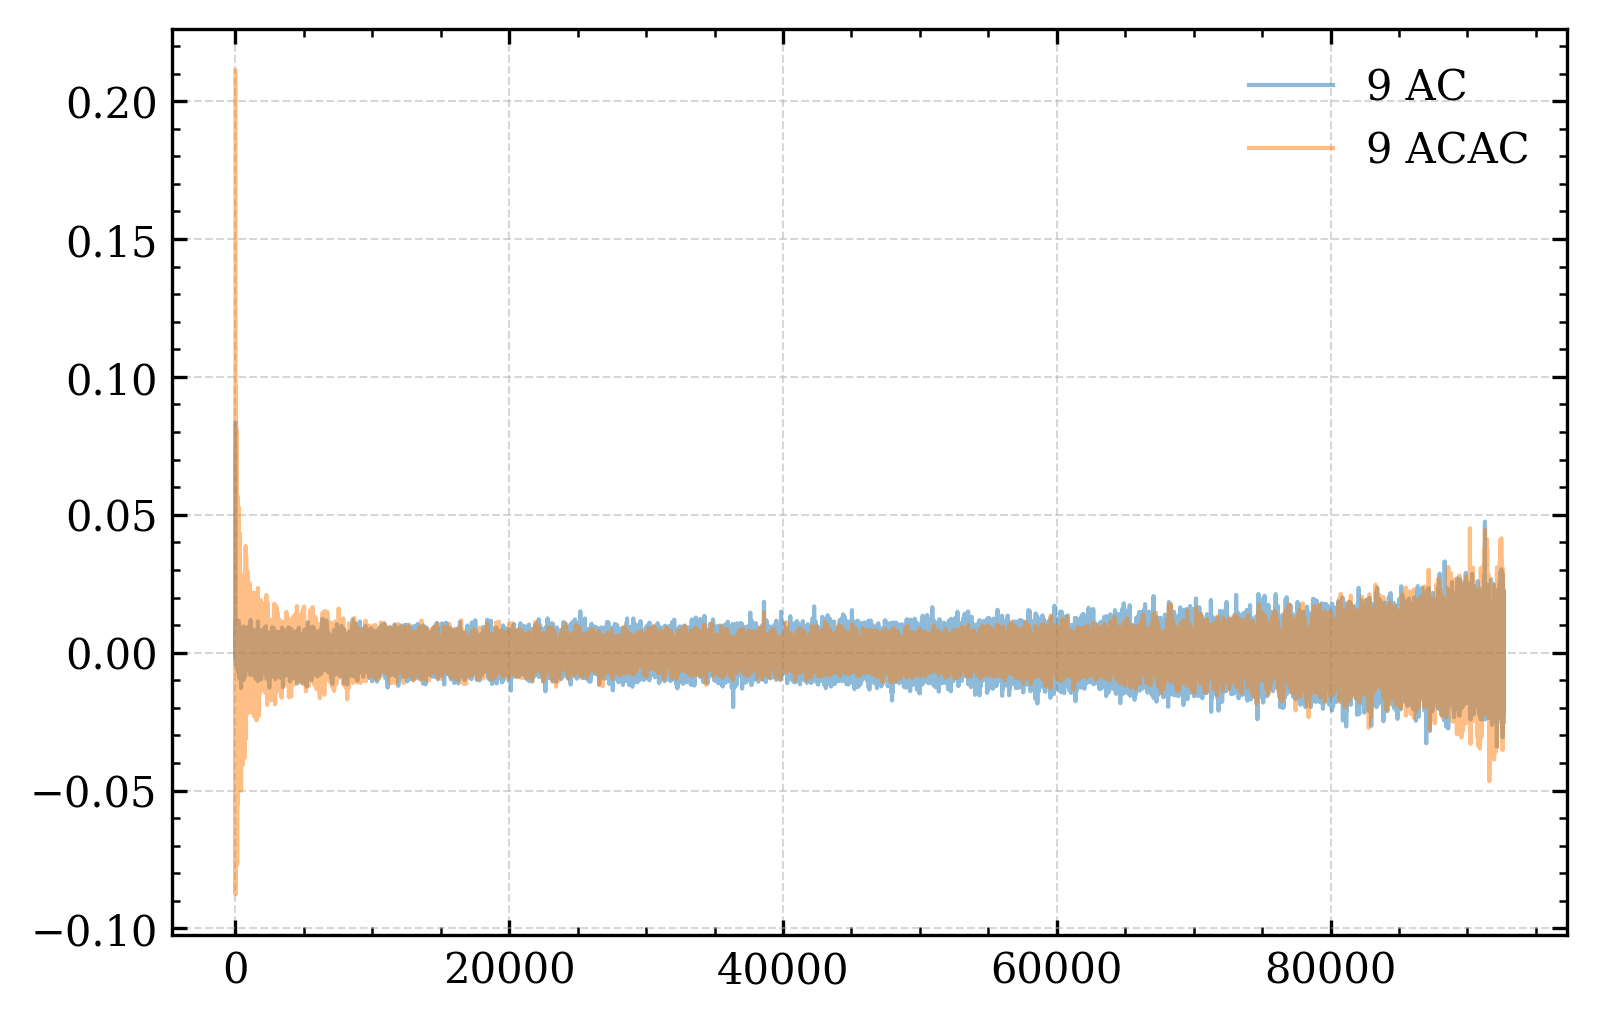

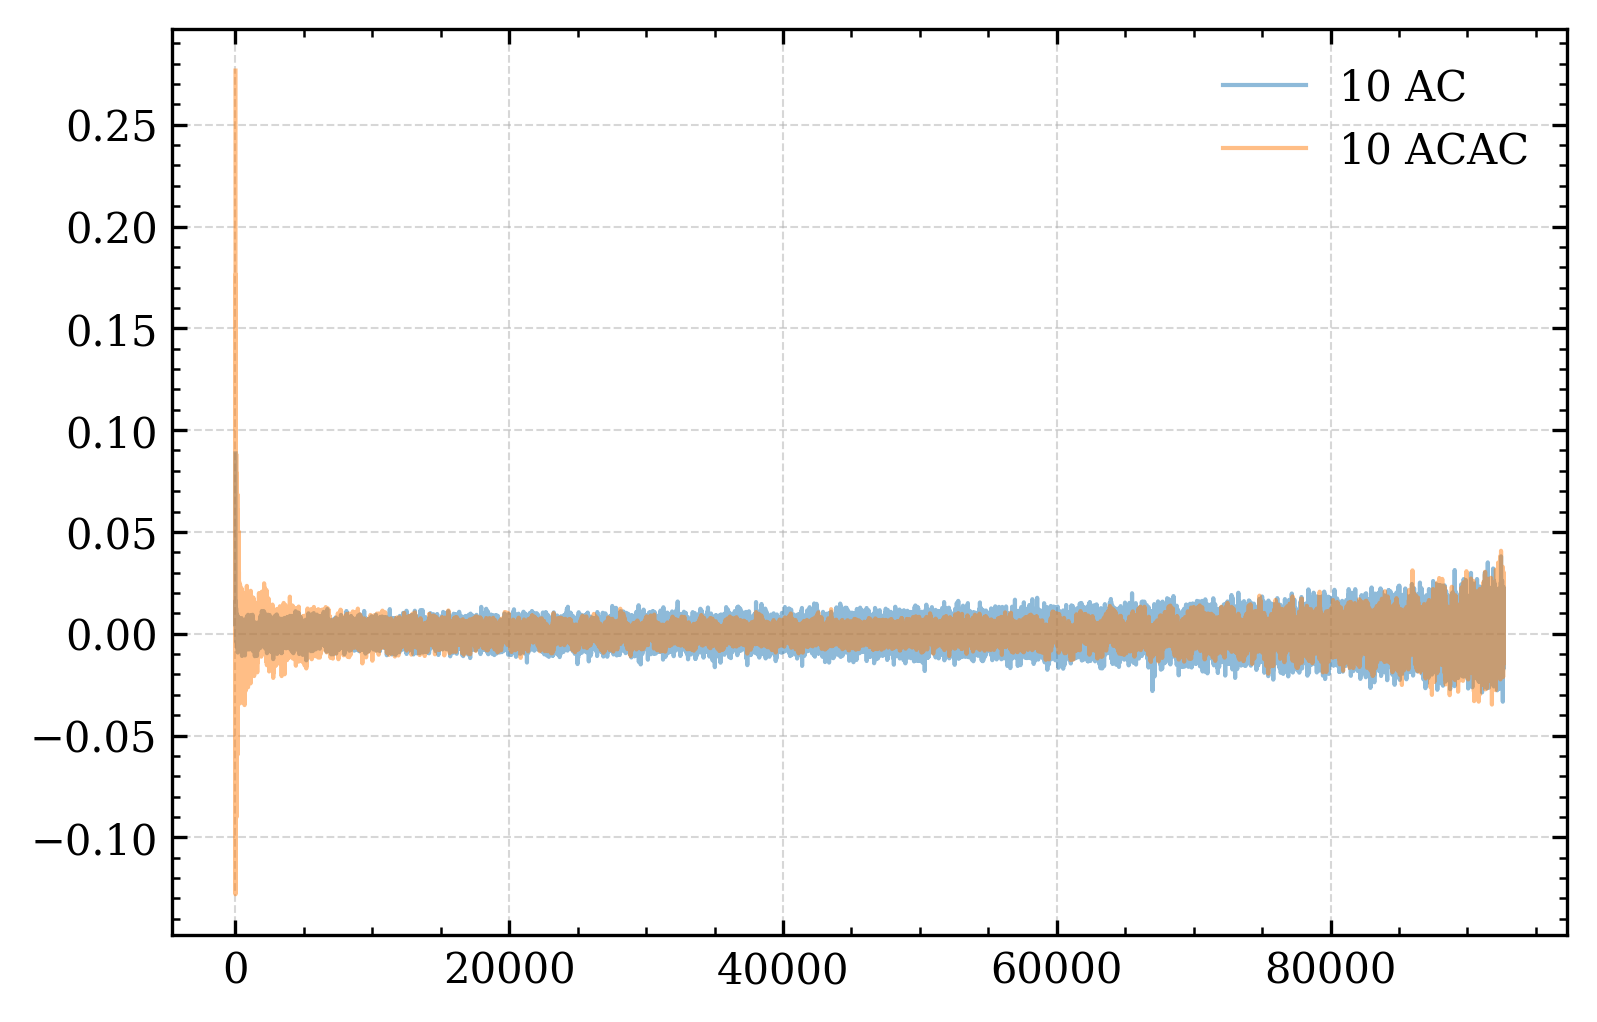

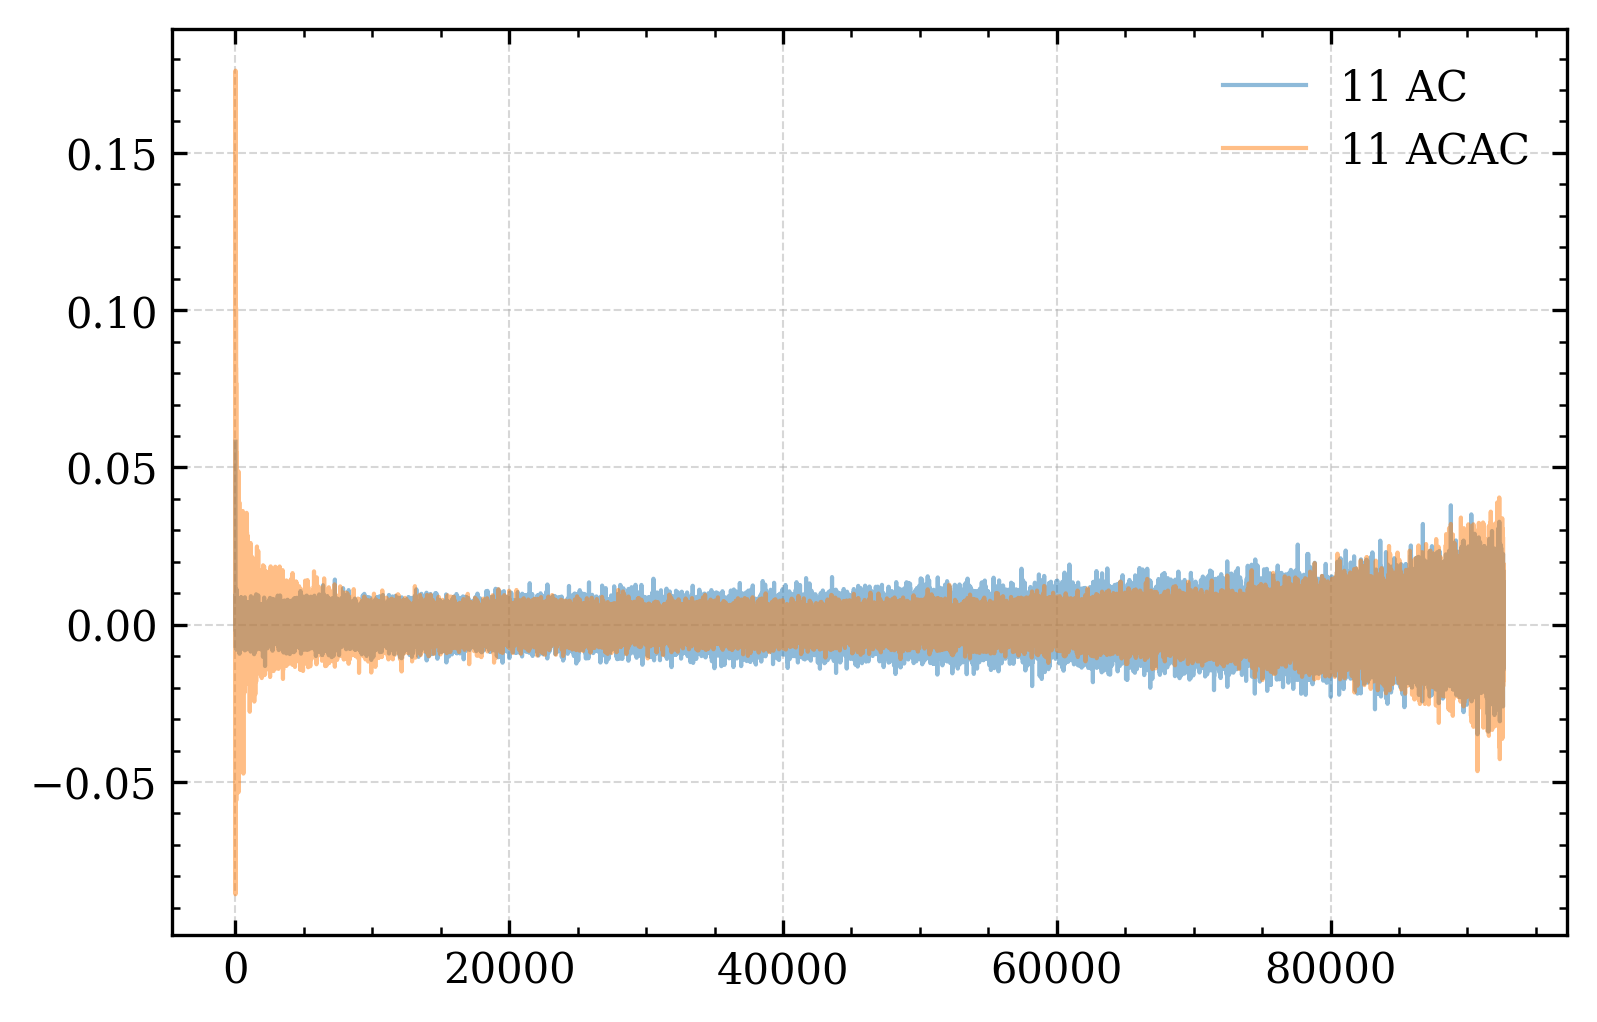

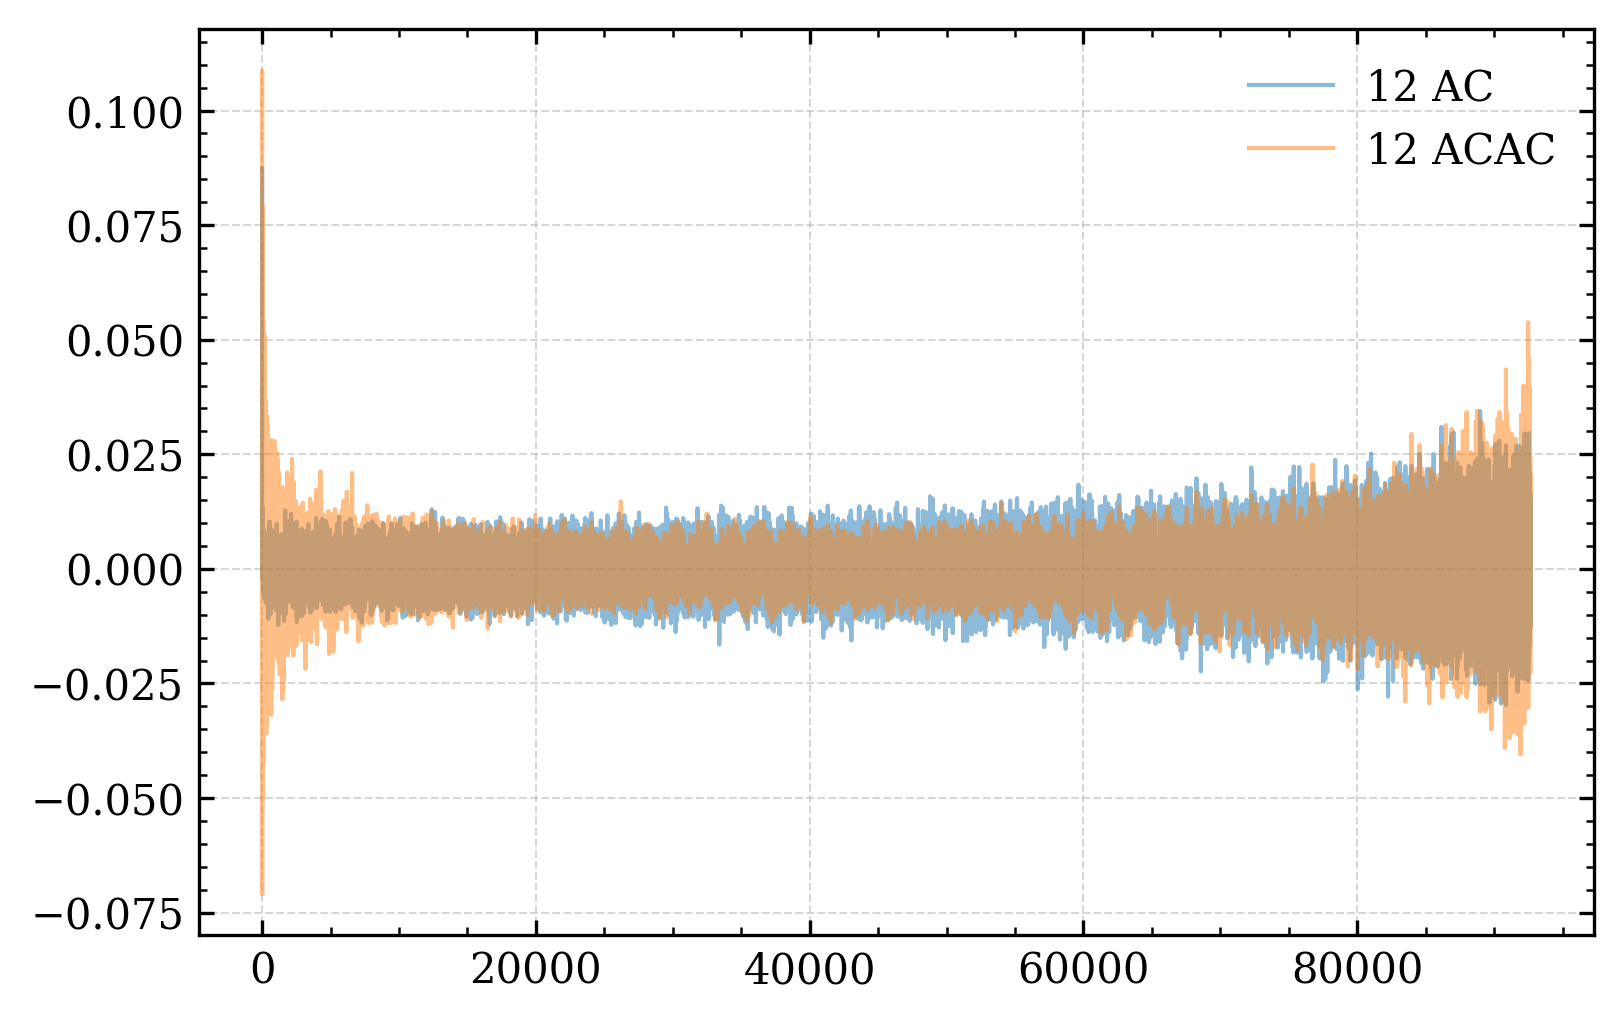

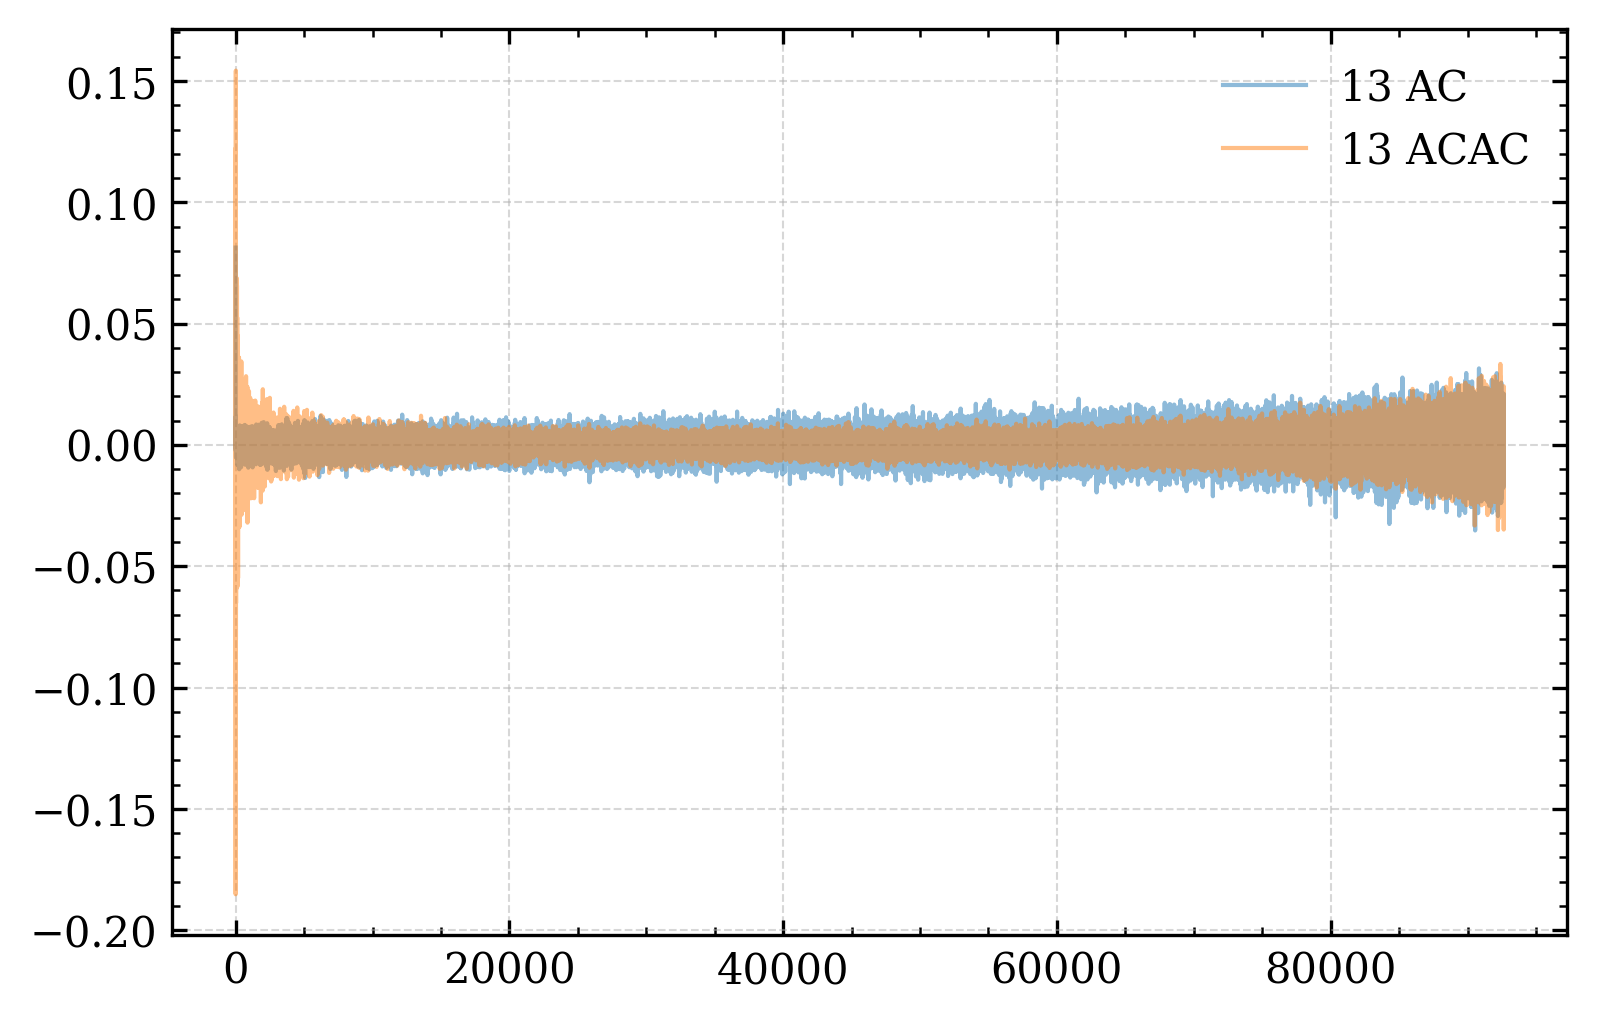

KeyboardInterrupt: 

In [69]:
acs  = None
for d in np.arange(len(gwat[0])):
    acs = AC(gwat[:,d])
    acacs = AC(acs)
    plt.plot(acs[1:int(.9*len(acs))],label=str(d)+" AC",alpha=.5)
    plt.plot(acacs[1:int(.9*len(acs))],label=str(d)+" ACAC",alpha=.5)
    plt.legend()
    plt.show()
    plt.close()
print(acs)

0.8064856711012506


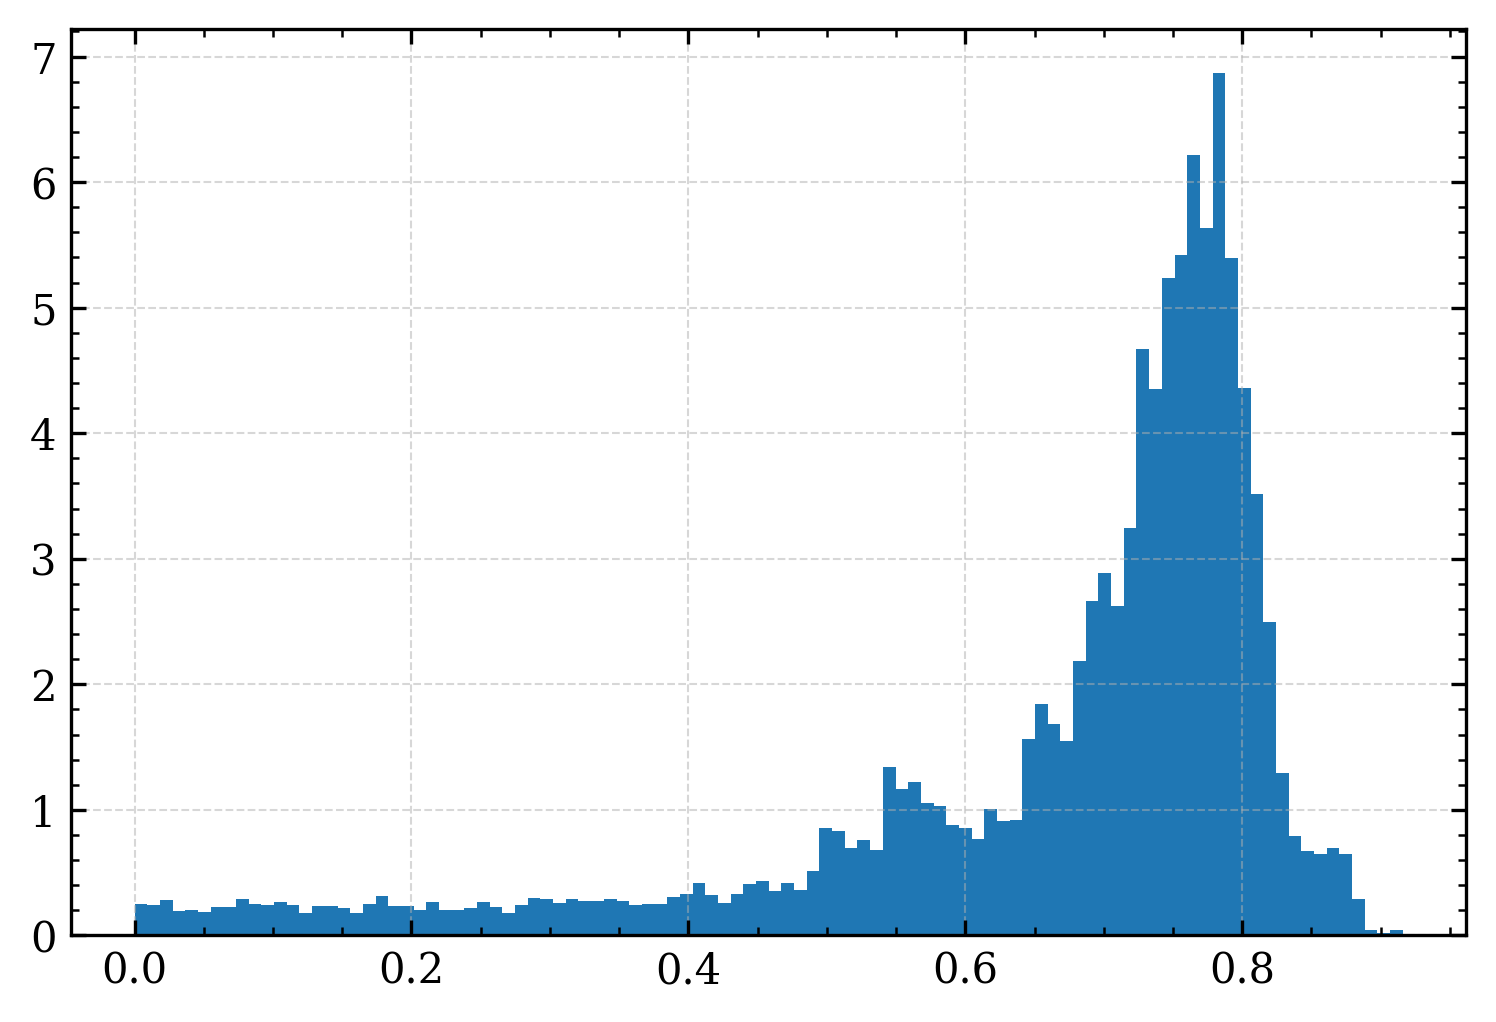

In [20]:
hp = plt.hist(gwat[:,-1],bins=100,density=True)
print(np.quantile(gwat[:,-1],.9))

3.893070532456769


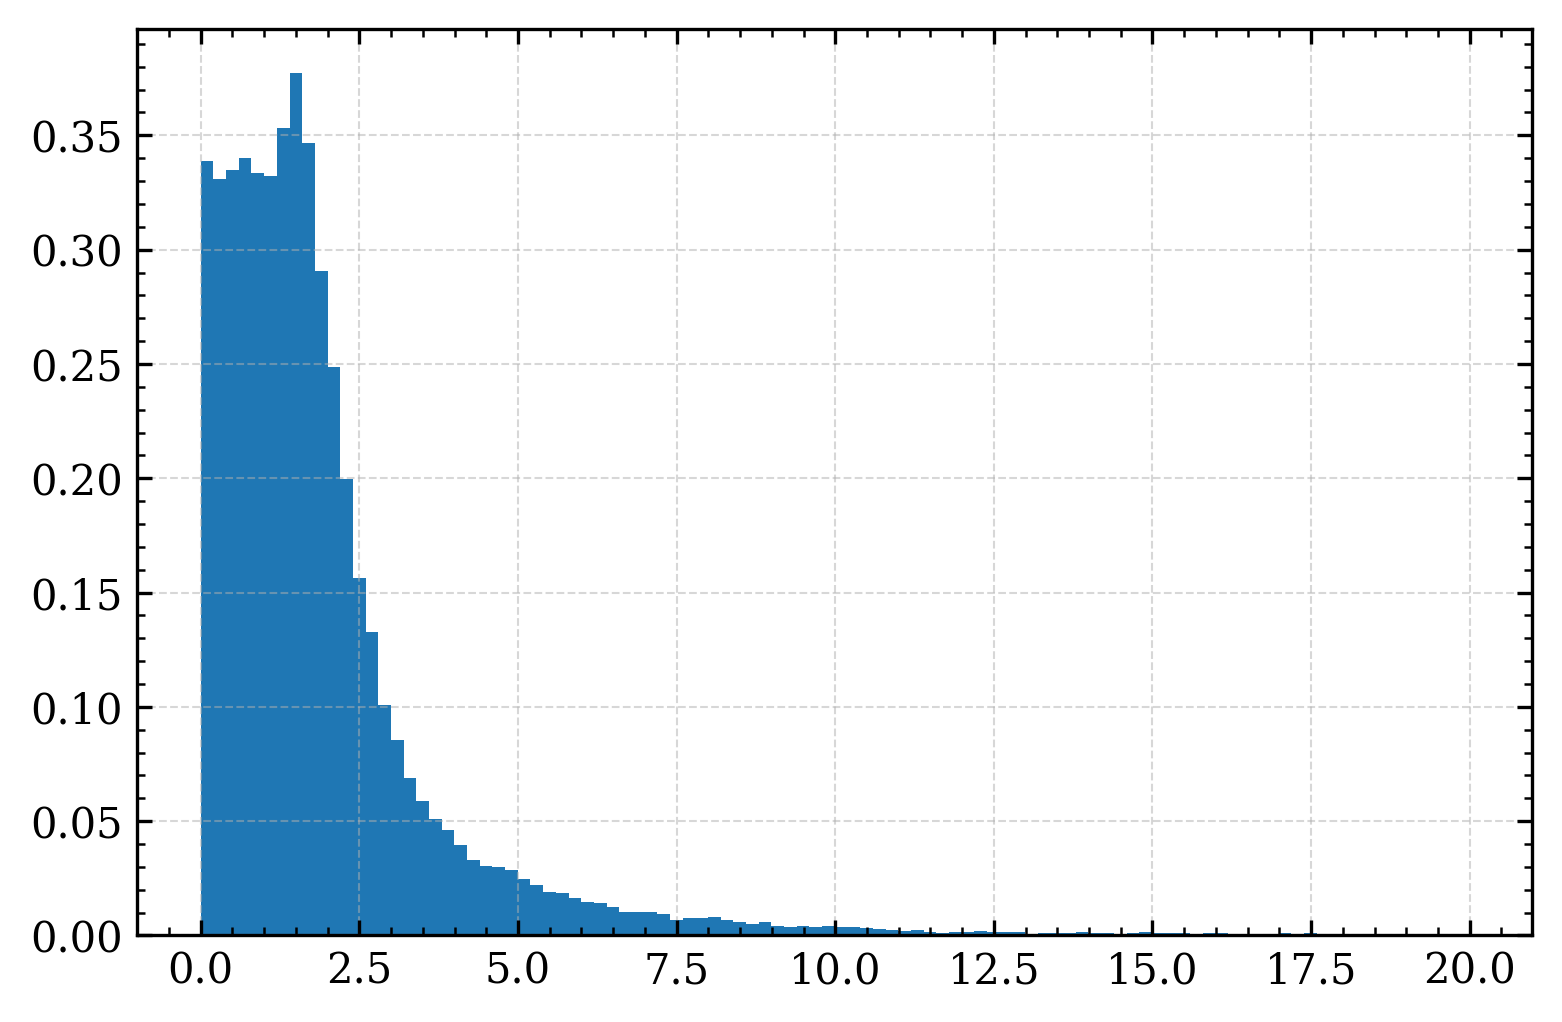

In [12]:
hp = plt.hist(gwat[:,-2],bins=100,density=True)
print(np.quantile(gwat[:,-2],.9))

trim:  0
ac:  87.86
trim:  0
ac:  126.725
Chain 1 3.4833980795430426
Chain 2 2.9872452213195038


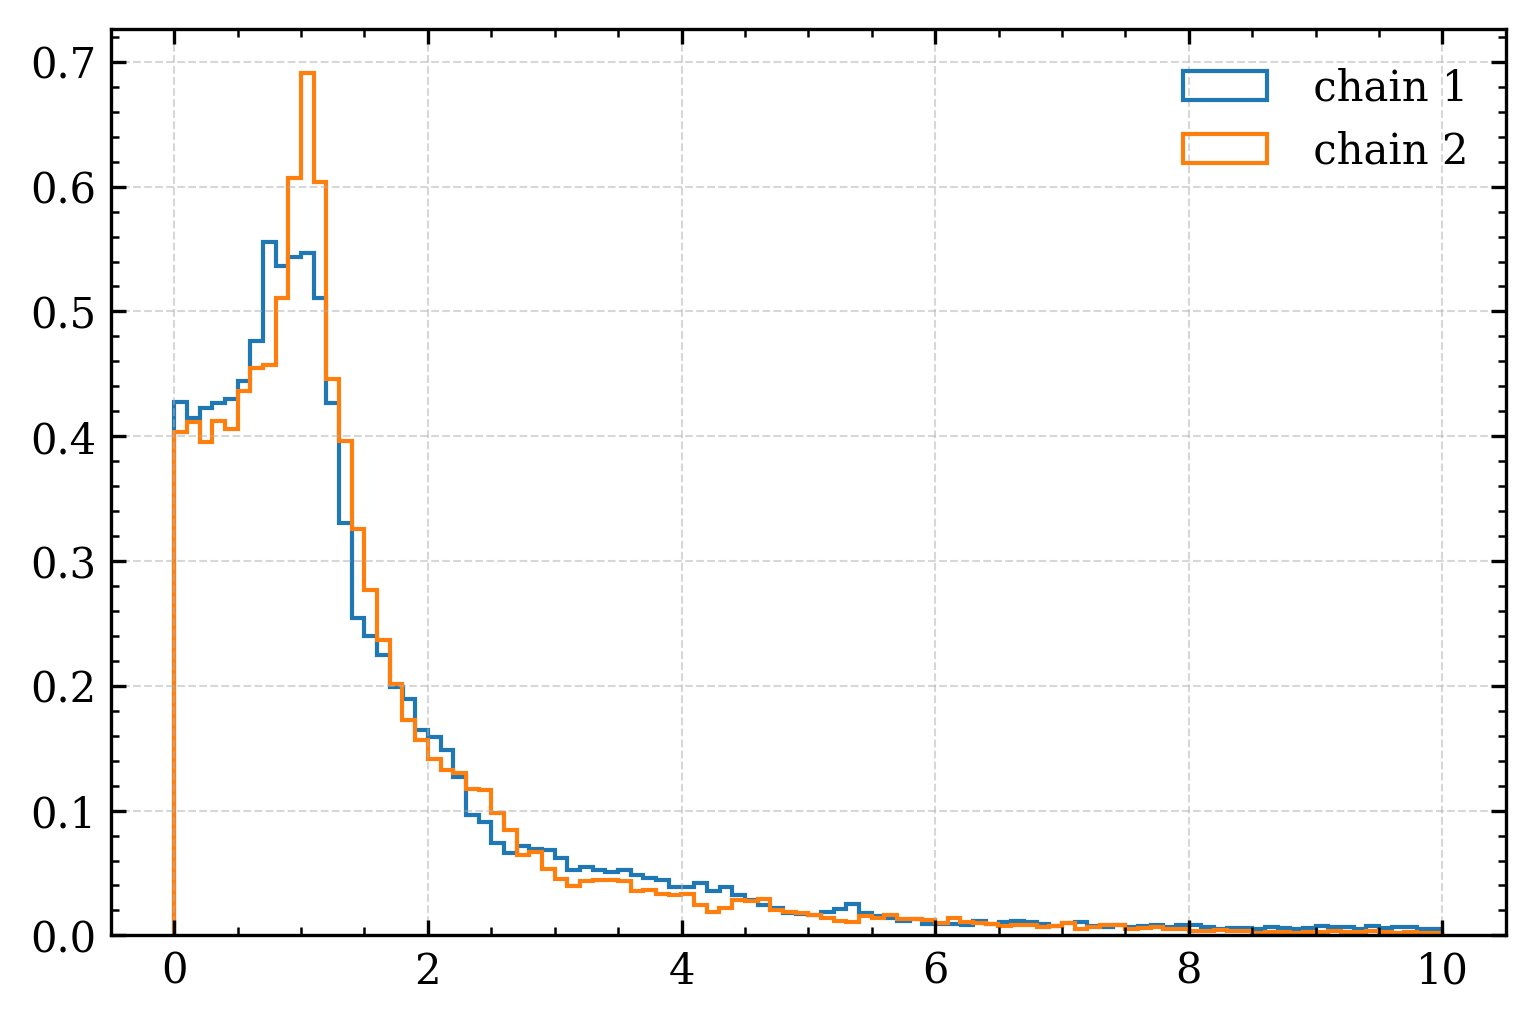

In [10]:
source = "GW190924"
dat1 = gmcmc.trim_thin_file("../data_temp/{source}/EdGB_proper_init/output_{source}_continue.hdf5".format(source=source))
dat2 = gmcmc.trim_thin_file("../data/{source}/EdGB/output_{source}_continue.hdf5".format(source=source))
#dat3 = gmcmc.trim_thin_file("../data/{source}/EdGB_GHOv2/output_{source}_continue.hdf5".format(source=source))
#dat4 = gmcmc.trim_thin_file("../data/{source}/EdGB_GHOv3/output_{source}_continue.hdf5".format(source=source))

plt.hist(dat1[:,-1],bins=100,density=True,histtype="step",label=" chain 1")
plt.hist(dat2[:,-1],bins=100,density=True,histtype="step",label=" chain 2")
#plt.hist(dat3[:,-2],bins=100,density=True,histtype="step",label=" chain 3")
#plt.hist(dat4[:,-2],bins=100,density=True,histtype="step",label=" chain 4")
print("Chain 1",np.quantile(dat1[:,-1],.9))
print("Chain 2",np.quantile(dat2[:,-1],.9))
plt.legend()
plt.show()